# Classification Analysis

Author: Craig Wilcox

Date: April 2, 2025

Introduction: This project will work with a Titanic passenger dataset and the goal will be do compare different classification approaches. To do this I will load and explore the dataset, analyze features, and train/evaluate models. 

## Section 1 - Imports and Inspect Data

In [76]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [77]:
# Load and inspect data
df = pd.read_csv('data/titanic.csv')

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Reflection 1

What do you notice about the dataset? Large number of variables. Not to much sticks out with the basic data.

Are there any data issues? Cabin and Age have missing numbers. Something will have to be done with those items later while cleaning the data.

## Section 2 - Data Exploration and Preperation
- explore data patterns and distributions
- handle missing values and clean data
- feature selection and engineering

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

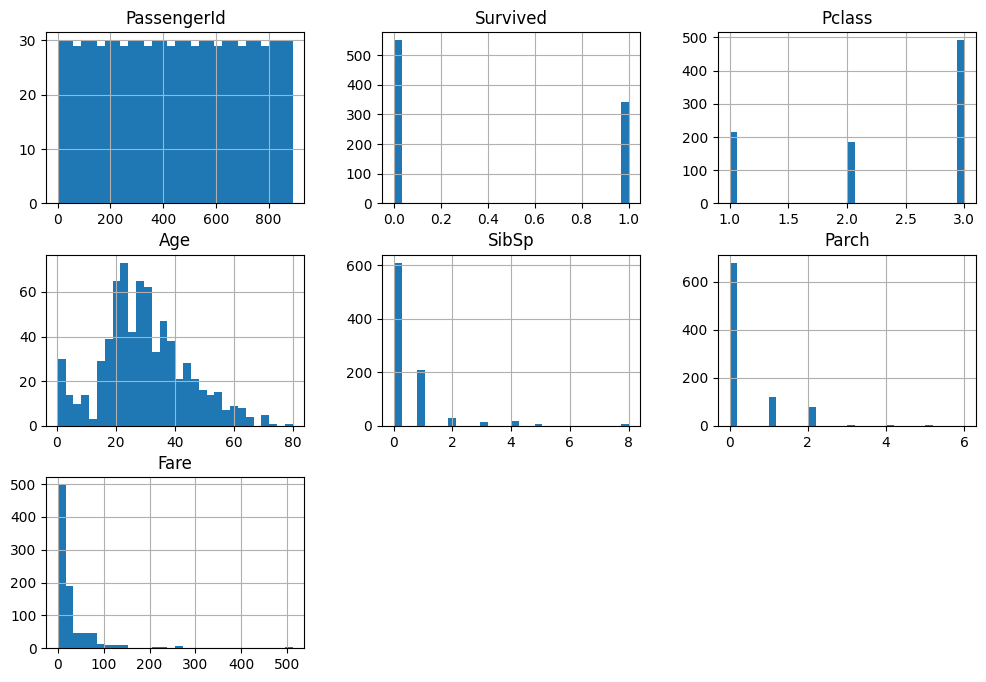

In [81]:
# Histograms of data

df.hist(bins=30, figsize=(12, 8))

<Axes: xlabel='Survived', ylabel='Age'>

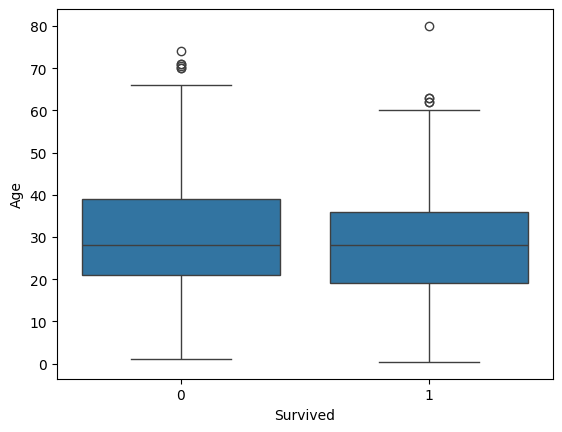

In [82]:
# Boxplot of data

sns.boxplot(x='Survived', y='Age', data=df)

In [83]:
# Drop missing values from Cabin column
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

# Input median for missing age values
df['Age'] = df['Age'].fillna(df['Age'].median())

# Convert Sex column from categorical to a numerical column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Create new column 'family' which is combining any passenger who is traveling with a child or parent as indicated in the parch category
df['family'] = df['Parch'] > 0


### Reflection 2

What patterns or anomalies do you see? That the survivors were slightly younger than the deceased

Do any features stand out? There are small amounts of families in the data set which could be used for analyses and classification that show in the Sibsp and Parch columns

What preprocessing steps were necessary to clean and improve the data? I dropped missing values in Cabin column and input median ages for missing values in Age column.

Did you create or modify any features to improve performance? I modified Sex from male/femail 10 0/1 to make code simpler and added a column column families based on the Parch column. This will allow me to pull passengers traveling with families.

## Feature Selection and Justification
- I will be using 3 features to test survivability Age, Passenger class, and Family. These features all likely have an impact on survivability and we can test them in multiple ways

In [84]:
# Case 1 Age
X1 = df[['Age']]
y1 = df['Survived']

# Case 2 Passenger class
X2 = df[['Pclass']]
y2 = df['Survived']


### Reflection 3

Why did you choose these features? These 3 features I would predict have a high likelyhood on survivability in a disaster like this. Age is generally associated with survivability, class of passenger/wealth can often be attributed to survivability in a disaster.

How might they impact predictions or accuracy? This was answered in the previous reflection as well but picking these features was specific to drive accuracy in the predictions. I am not looking for innacuracy in the models

## Section 4 Train, Test, and Evaluate Case 1

In [85]:
# Split Data using train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=123)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=123)

print('Train size:', len(X_train1))
print('Test size:', len(X_test1))
print('Train size:', len(X_train2))
print('Test size:', len(X_test2))


Train size: 712
Test size: 179
Train size: 712
Test size: 179


In [86]:
# Train Model
model1 = LinearRegression()
model1.fit(X_train1,y_train1)

LinearRegression()

In [87]:
# Predict Model
y_pred1 = model1.predict(X_test1)

In [88]:
# Evaluate Test
r2 = r2_score(y_test1,y_pred1)

print(f'R²: {r2:.2f}')

R²: -0.01


### Section 4 Reflection

How well did the model perform? The model did not perform well as indicated by a -.01 R² result.

Any surprises in the results? Based on the earlier graph my prediction of age being a driver of survivability is not supported by this model so this is a surprise. More than likely this is because age is not the only factor

## Section 5 Alternate Model 

In [89]:
# Create and Train Decision Tree

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train2, y_train2)

DecisionTreeClassifier()

In [90]:
# Predict and evaluate data

y2_pred = tree_model.predict(X_train2)
print("Results:")
print(classification_report(y_train2, y2_pred))

Results:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       435
           1       0.63      0.38      0.47       277

    accuracy                           0.67       712
   macro avg       0.66      0.62      0.62       712
weighted avg       0.66      0.67      0.65       712



### Reflection 5 

Which model performed better? I would say the decision tree model performed better though there was still a lot of room for improvement.  A simple improvement that would likely impact results would be changing to stratified split rather than standared for class imbalance

Why might one classifier be more effective in this specific case? Since we are using a small size of survivability as the result single classifiers stand out much better than others.

## Section 6 Summary

1. Summary of findings
   - This dataset though consistent and clean does have weaknesses when using standard techniques as there are limited variables to use specifically when trying to relate to survivability
   - Neither model that I used was particularly successful 
   - Through the fairlure in the modeling I did find ways to improve in the future through different techniques
2. Challenges faced
   - I could not get my new column to yield results when using the models which was a disappointment
   - Through trial and error I even attempted to change to different data types but it still would not analyze and errors were occurring
   - I decided for the sake of the project to do different more attainable analysis
3. If I had more time what would I try next
   - I am convinced that children has a high factor in survivability but I could not transform the data in a way to experiment with it if I had more time that is what I would work on

### Reflection 6

What did you learn from this project? I have so much more to learn when using code to make data work for me. I understand the theory behind what I want to work but still struggle in the application. I will continue to learn and fail which will lead to successes.
